Import the packages.

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from sklearn.cross_validation import cross_val_score

Read in the data and extract features from labels. 

In [2]:
df = pd.read_csv('./Data/munged_df.csv', index_col='account_id')
feature_cols = list(df.columns[:-1])
target_col = df.columns[-1] 
X_all = df[feature_cols]
y_all = df[target_col] 

In [3]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_all = scaler.fit_transform(X_all)

In [4]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all , 
                                                    y_all, 
                                                    stratify=y_all,
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 13285 samples.
Testing set has 3322 samples.


In [ ]:
# y_train[y_train==1] = -1
# y_train[y_train==0] = 1
# y_train[y_train==-1] = 0

In [ ]:
def svccv(C, gamma):
    return cross_val_score(SVC(C=C, gamma=gamma, random_state=2, kernel='rbf'),
                           X_train, y_train, 'f1', cv=2).mean()

if __name__ == "__main__":
    gp_params = {"alpha": 1e5}

    svcBO = BayesianOptimization(svccv, {'C': (0.0001, 1000), 'gamma': (0.0001, 1000)})
    svcBO.explore({'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]})

    svcBO.maximize(n_iter=10, **gp_params)
    print('SVC: %11.9f' % svcBO.res['max']['max_val'])


In [ ]:
results = svcBO.res['max']
rbf_gamma = results['max_params']['gamma']
rbf_C = results['max_params']['C']
print(rbf_C)
print(rbf_gamma)

In [ ]:
clf = SVC(C=rbf_C, cache_size=200, gamma=rbf_gamma, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

In [ ]:
plt.clf()
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('Precision-Recall of Customer Conversion: AUC={0:0.2f}'.format(average_precision))
plt.show()
# path = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
#        'Capstone_Project/Images'
# savepath = os.path.join(path, 'exploratory_analysis-feature_means.png')
# plt.savefig(savepath)
# plt.clf()

## Linear SVC

In [9]:
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score)


# from sklearn.cross_validation import GridSearchCV
from sklearn import grid_search

# TODO: Create the parameters list you wish to tune
parameters = {  
            'C':           [
                            1e-3
                            ,1e-2
                            ,1e-1
                            ,1
                            ,1e1
                            ,1e2
                            ,1e3
                            ]
             }

# TODO: Initialize the classifier
clf = svm.LinearSVC(random_state=1) 

# f1_scorer, average_precision
grid_obj = grid_search.GridSearchCV(clf, parameters, scoring=scorer, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print(clf)

LinearSVC(C=1000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)


In [13]:
clf = svm.LinearSVC(C=1000, max_iter=-1, random_state=1, tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

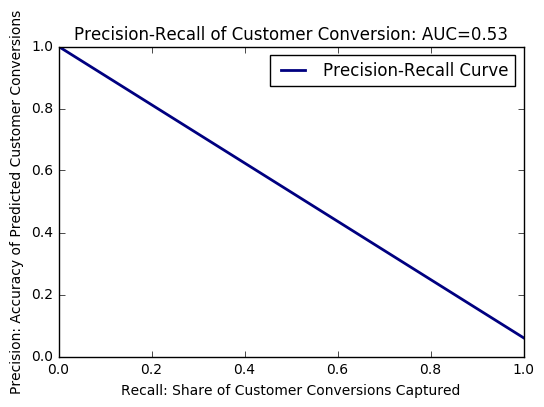

In [16]:
plt.clf()
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('Precision-Recall of Customer Conversion: AUC={0:0.2f}'.format(average_precision))
plt.show()
# path = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
#        'Capstone_Project/Images'
# savepath = os.path.join(path, 'exploratory_analysis-feature_means.png')
# plt.savefig(savepath)
# plt.clf()